<a href="https://colab.research.google.com/github/sonwh123/Deep-Learning/blob/master/%ED%80%80%ED%85%80AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_baseline_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Machine learning Guide

이 안내 노트북에서는 양자 컴퓨팅 프레임 워크에 대한 개략적인 소개와 QML의 구현 방법을 알아 봅니다.


다양한 QML framework가 있고 기존 ML framework들과 잘 통합되어 있습니다.
일반적으로는 다음 2 개를 많이 사용합니다.

1. Pennylane: 캐나다 Xanadu에서 만든 양자 컴퓨팅 Framework입니다. 다른 프로젝트들에 비해 머신러닝에 친화적인 인터페이스와 요소를 제공합니다.
2. Qiskit: IBM에서 만든 양자컴퓨팅 Framework입니다. 좀 더 물리적인 실험과 및 대규모 HPC 연산을 포함하는 통합적인 Framework를 제공하고 있습니다.

여기서는 QML 구현을 위해 Pennylane을 사용해 볼 것입니다.

Pennylane은 PyPI에 등록되어 있습니다. 현재 최신 버전은 0.4.x입니다.
다음 명령어로 Python 환경에 `pennylane`을 설치하세요.

Pennylane에 대한 Tutorial과 자세한 사항들은 [Pennylane codebook](https://pennylane.ai/codebook)과 [Demos](https://pennylane.ai/search/?contentType=DEMO&categories=how-to&sort=publication_date) 를 참고하세요.

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.2 MB/s eta 0:00:00


## 양자 회로 설계하기

In [ ]:
import pennylane as qml # 일반적으로 qml이란 이름으로 가져옵니다. Quantum Machine Learning의 약자입니다.
import numpy as np

dev = qml.device("default.qubit", wires=3) # device를 정의합니다.

@qml.qnode(dev)
def circuit():
    qml.H(0)
    qml.S(0)
    qml.H(1)
    qml.H(2)
    return qml.probs()

## 양자 회로 그리기

In [ ]:
print(qml.draw(circuit)())

In [ ]:
print(qml.draw(circuit)())
qml.draw_mpl(circuit)()

|양자 회로| ML|
|:--:|:--:|
|Quantum Circuit| Layer, ML Module|
|Backend | device(CPU, CUDA, ...)|

## Backend

Backend는 실제 양자 회로를 구동하는 시뮬레이터, 혹은 양자 컴퓨터입니다. 한 개의 회로를 어느 기기에서 돌릴 지 미리 선언을 해주어야 합니다.


**Backend 선택하기**

다양한 Backend를 양자 회로를 돌리는 데 사용할 수 있습니다. Pennylaned의 `default.qubit`, `lightning.qubit`등 뿐만 아니라, Qiskit, IQM 등 실제 양자 컴퓨터의 Backend interface를 가져와 사용할 수도 있습니다.
그러나, QML을 구현하고 시험해 볼 때는 `default.qubit`이 권장됩니다. 다른 ML 프레임워크와의 결합도 간편할 뿐더러 가장 빠른 differentiation 방법을 제공합니다.

Backend 선택과 개별 device에 대한 정보는 Pennylane의 공식 문서: [Quantum Devices](https://pennylane.ai/devices)를 참고하세요.

In [ ]:
NUMBER_OF_WIRES =20
dev = qml.device("default.qubit", wires=NUMBER_OF_WIRES, shots=3000)

## 측정하기

- `qml.probs`: 개별 state들의 측정 확률 벡터입니다. $N$ qubit에 대해 $2^N$ 크기를 가집니다.
- `qml.expval`: Pennylane의 Observable들을 측정합니다. 기초적으로 `qml.PauliZ(i), qml.PauliX(i), qml.PauliY(i)`가 있으며 이들을 조합 하거나/여러개의 Observable을 측정할 수 있습니다.

In [ ]:
dev_3 = qml.device("default.qubit", wires=3)

@qml.qnode(dev_3)
def circuit1():
    qml.H(0)
    qml.H(1)
    return qml.expval(qml.PauliX(0))
@qml.qnode(dev_3)
def circuit2():
    qml.H(0)
    qml.H(1)
    return qml.probs()
@qml.qnode(dev_3)
def circuit3():
    qml.H(0)
    qml.H(1)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]


In [ ]:
circuit1()

In [ ]:
circuit2()

In [ ]:
circuit3()

In [ ]:
obs = qml.PauliZ(0) @ qml.PauliX(1)
obs

In [ ]:
@qml.qnode(dev_3)
def circuit4():
    qml.H(0)
    qml.H(1)
    qml.H(2)
    return qml.expval(obs)

In [ ]:
circuit4()

## 양자 회로의 설계

In [ ]:
from pennylane import numpy as np_p

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def single_qubit_circuit(theta, input_value):
    qml.RX(theta, wires=0)
    qml.RY(input_value, wires=0)
    return qml.expval(qml.PauliZ(0))


In [ ]:
single_qubit_circuit(0.1, 0.2) # Customized numpy result

In [ ]:
#Batched data
theta = 0.032
theta_b = np_p.array([0.2, 0.3, 0.5])
input_value_b = np_p.array([3.2, 1.2, 0.1])


In [ ]:
single_qubit_circuit(theta_b, input_value_b) # Parameter가 모두 Batched parameter

In [ ]:
single_qubit_circuit(theta, input_value_b) # Single, batched parameter 조합

#### Pennylane Optimizer

In [ ]:
opt = qml.GradientDescentOptimizer(stepsize=0.01)
max_iterations = 500
conv_tol = 1e-06
param = np_p.random.rand(1, requires_grad=True)

his_param = []
his_energy = []
for i in range(max_iterations):
    param, prev_energy = opt.step_and_cost(lambda x: single_qubit_circuit(x, input_value_b[0]), param)
    his_param.append(param)
    his_energy.append(prev_energy)
    energy = single_qubit_circuit(param, input_value_b[0])
    conv = np_p.abs(prev_energy - energy)
    if conv <= conv_tol:
        break


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(his_energy)

### Torch integration

In [ ]:
import torch
from torch.optim import Adam
from torch.nn.parameter import Parameter
from torch.nn import NLLLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
torch_theta = torch.rand(4)
torch_phi = torch.rand(4)
single_qubit_circuit(torch_theta, torch_phi) # Torch tensor의 경우 자동으로 tensor array로 변환

NameError: name 'single_qubit_circuit' is not defined

In [ ]:
parameter = Parameter(torch.tensor( torch.rand(1).item(), requires_grad = True))
parameter

In [ ]:
optim = Adam([parameter], lr= 0.001)

In [ ]:
input_data = torch.rand(1)
history_e  =[]
for i in range(1000):
    optim.zero_grad()
    result = single_qubit_circuit(input_data, parameter)+1
    loss = (result)
    loss.backward()
    history_e.append(result.item())
    optim.step()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history_e)

# 분류 모델 만들기

## 0-1 binary classfiers

### Fashion MINIST dataset

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.5 MB/s eta 0:00:00


In [2]:
import torch
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import torchvision
import pennylane as qml
import numpy as np
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.nn import NLLLoss
from IPython.display import clear_output

In [3]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,))
        ])

train_ds = torchvision.datasets.FashionMNIST(
    "./", train=True, download=True,
    transform=transform)

test_ds = torchvision.datasets.FashionMNIST(
    "./", train=False, download=True,
    transform=transform)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.4MB/s]


In [4]:
train_mask = (train_ds.targets == 0) | (train_ds.targets == 6)
train_idx = torch.where(train_mask)[0]
train_ds.targets[train_ds.targets == 6] = 1

binary_train_ds = Subset(train_ds, train_idx)

In [37]:
train_loader = DataLoader(binary_train_ds, batch_size = 128, shuffle =True)

In [6]:
from matplotlib import pyplot as plt

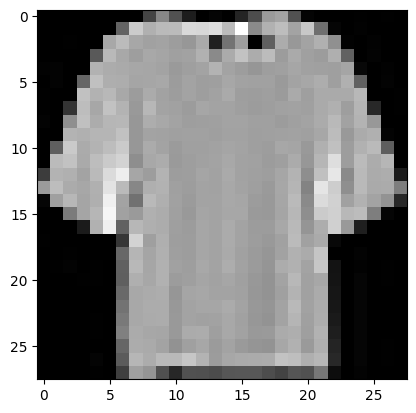

In [7]:
plt.imshow(binary_train_ds[20][0][0], cmap="grey")

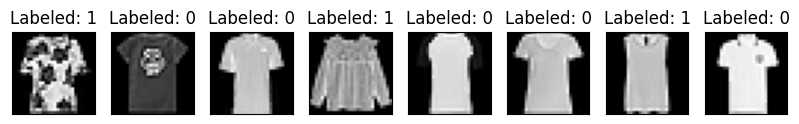

In [8]:
n_samples_show = 8

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [9]:
from torch.nn import Module
import torch.nn.functional as F
from torch.nn import Conv2d, Dropout2d, Linear, BatchNorm2d
from torch import cat

In [25]:
torch.set_default_dtype(torch.float64)
class BinaryClassifier(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(1, 64, kernel_size=3, padding = 1)
        self.bn1 = BatchNorm2d(64)
        self.conv2 = Conv2d(64, 64, kernel_size=5)
        self.bn2 = BatchNorm2d(64)
        self.conv3 = Conv2d(64, 64, kernel_size=5)
        self.bn3 = BatchNorm2d(64)
        self.dropout = Dropout2d()
        self.fc1 = Linear(1024, 256)
        self.fc2 = Linear(256, 64)
        self.fc3 = Linear(64, 4)
        self.fc4 = Linear(1, 1)

        # Quantum layer
        self.q_device = qml.device("default.qubit", wires=4)
        self.qnn_params = Parameter(torch.rand(24), requires_grad= True)
        self.obs = qml.PauliZ(2)

        @qml.qnode(self.q_device)
        def circuit(x):
            #Feature Encoding
            for i in range(4):
              qml.H(wires=i)
              qml.RZ(torch.pi*x[:,i], wires=i)
            for i in range(4):
              qml.H(wires=i)
              qml.RZ(torch.pi*x[:,i], wires=i)
            #---------------
            #Convolution1
            qml.RZ(self.qnn_params[0], wires=0)
            qml.RY(self.qnn_params[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(self.qnn_params[2], wires=1)
            qml.CNOT(wires=[1, 0])

            qml.RZ(self.qnn_params[3], wires=2)
            qml.RY(self.qnn_params[4], wires=3)
            qml.CNOT(wires=[2, 3])
            qml.RY(self.qnn_params[5], wires=3)
            qml.CNOT(wires=[3, 2])

            qml.RZ(self.qnn_params[6], wires=0)
            qml.RY(self.qnn_params[7], wires=2)
            qml.CNOT(wires=[0, 2])
            qml.RY(self.qnn_params[8], wires=2)
            qml.CNOT(wires=[2, 0])

            qml.RZ(self.qnn_params[9], wires=1)
            qml.RY(self.qnn_params[10], wires=3)
            qml.CNOT(wires=[1, 3])
            qml.RY(self.qnn_params[11], wires=3)
            qml.CNOT(wires=[3, 1])

            qml.RZ(self.qnn_params[12], wires=0)
            qml.RY(self.qnn_params[13], wires=3)
            qml.CNOT(wires=[0, 3])
            qml.RY(self.qnn_params[14], wires=3)
            qml.CNOT(wires=[3, 0])

            qml.RZ(self.qnn_params[15], wires=1)
            qml.RY(self.qnn_params[16], wires=2)
            qml.CNOT(wires=[1, 2])
            qml.RY(self.qnn_params[17], wires=2)
            qml.CNOT(wires=[2, 1])
            #---------------
            #Pooling1
            qml.CNOT(wires=[2, 0])
            qml.RY(self.qnn_params[18], wires=2)
            qml.CNOT(wires=[0, 2])

            qml.CNOT(wires=[3, 1])
            qml.RY(self.qnn_params[19], wires=3)
            qml.CNOT(wires=[1, 3])

            #----------------
            #Feature Re-Encoding
            for i in range(2):
              qml.H(wires=i+2)
            qml.RZ(torch.pi*x[:,0]*x[:,2], wires=2)
            qml.RZ(torch.pi*x[:,1]*x[:,3], wires=3)
            for i in range(2):
              qml.H(wires=i+2)
            qml.RZ(torch.pi*x[:,0]*x[:,2], wires=2)
            qml.RZ(torch.pi*x[:,1]*x[:,3], wires=3)
            #---------------
            #Convolution2
            qml.RZ(self.qnn_params[20], wires=2)
            qml.RY(self.qnn_params[21], wires=3)
            qml.CNOT(wires=[2, 3])
            qml.RY(self.qnn_params[22], wires=3)
            qml.CNOT(wires=[3, 2])

            #---------------
            #Pooling2
            qml.CNOT(wires=[2, 3])
            qml.RY(self.qnn_params[23], wires=2)
            qml.CNOT(wires=[3, 2])
            #---------------

            return qml.expval(self.obs)

        self.qnn = circuit

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1,1024)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.sigmoid(x)
        x = self.qnn(x).view(-1,1)  # apply QNN
        x = self.fc4(x)
        return F.log_softmax(cat((x, 1 - x), -1), -1)

In [26]:
bc = BinaryClassifier()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bc.to(device)

BinaryClassifier(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)

In [27]:
# ───── 학습 전에 회로 제약 먼저 점검 ─────
import pennylane as qml, torch

dummy_x = torch.tensor(torch.rand(2,16), dtype=torch.float64)
specs = qml.specs(bc.qnn)(dummy_x)

/tmp/ipython-input-27-1416178305.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dummy_x = torch.tensor(torch.rand(2,16), dtype=torch.float64)


0: ──H──RZ(M0)──H──RZ(M0)──RZ(0.36)─╭●───────────╭X──RZ(0.70)─╭●───────────╭X──RZ(0.90)─── ···
1: ──H──RZ(M1)──H──RZ(M1)──RY(0.18)─╰X──RY(0.08)─╰●───────────│────────────│───RZ(0.54)─╭● ···
2: ──H──RZ(M2)──H──RZ(M2)──RZ(0.24)─╭●───────────╭X──RY(0.03)─╰X──RY(0.33)─╰●───────────│─ ···
3: ──H──RZ(M3)──H──RZ(M3)──RY(0.71)─╰X──RY(0.59)─╰●──RY(0.96)───────────────────────────╰X ···

0: ··· ────────────────────────╭●───────────╭X───────────────────────────╭X───────────╭●─── ···
1: ··· ───────────╭X───────────│────────────│───RZ(0.68)─╭●───────────╭X─│────────────│──╭X ···
2: ··· ───────────│────────────│────────────│───RY(0.28)─╰X──RY(0.21)─╰●─╰●──RY(0.27)─╰X─│─ ···
3: ··· ──RY(0.14)─╰●──RY(0.41)─╰X──RY(0.65)─╰●───────────────────────────────────────────╰● ···

0: ··· ──────────────────────────────────────────────────────────────────────────────┤     
1: ··· ───────────╭●─────────────────────────────────────────────────────────────────┤     
2: ··· ───────────│───H──RZ(M4)──H──RZ(M4)──RZ(0.8

(<Figure size 4400x500 with 1 Axes>, <Axes: >)

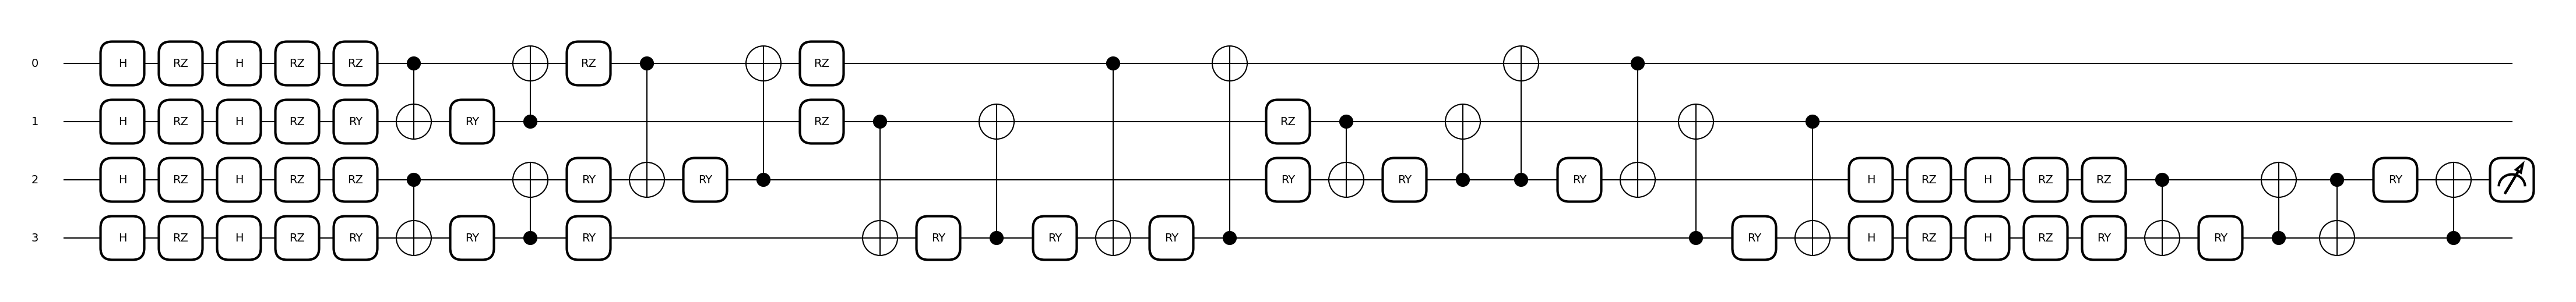

In [28]:
print(qml.draw(bc.qnn)(dummy_x))
qml.draw_mpl(bc.qnn)(dummy_x)

In [29]:
specs

{'resources': Resources(num_wires=4, num_gates=68, gate_types=defaultdict(<class 'int'>, {'Hadamard': 12, 'RZ': 19, 'RY': 17, 'CNOT': 20}), gate_sizes=defaultdict(<class 'int'>, {1: 48, 2: 20}), depth=30, shots=Shots(total_shots=None, shot_vector=())),
 'errors': {},
 'num_observables': 1,
 'num_trainable_params': 24,
 'num_device_wires': 4,
 'num_tape_wires': 4,
 'device_name': 'default.qubit',
 'level': 'gradient',
 'gradient_options': {},
 'interface': 'auto',
 'diff_method': 'best',
 'gradient_fn': 'backprop'}

In [30]:
assert specs["num_tape_wires"] <= 8,  "❌ 큐빗 수 초과"
assert specs['resources'].depth <= 30, "❌ 회로 깊이 초과"
assert specs["num_trainable_params"]<= 60, "❌ 학습 파라미터 수 초과"

print("✅ 회로 제약 통과 — 학습을 계속합니다")

✅ 회로 제약 통과 — 학습을 계속합니다


In [31]:
len(iter(train_loader))

47

In [32]:
data, target = next(iter(train_loader))

In [33]:
optimizer = Adam(bc.parameters(), lr=0.0001)
loss_func  = NLLLoss()

loss_history = []
bc.train()

BinaryClassifier(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)

In [34]:
data.shape

torch.Size([256, 1, 28, 28])

In [35]:
from tqdm import tqdm
from datetime import datetime

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bc.to(device)
epochs = 5
iterations = 4
iteration_history = []

for iteration in range(iterations):
  for epoch in range(epochs):
      # 에폭 진행률 바
      epoch_bar = tqdm(range(len(train_loader)),
                      desc=f"Epoch {epoch+1}/{epochs}",
                      leave=False)   # leave=False면 다음 에폭 때 덮어씀

      total_loss = []
      for bidx, (data, target) in zip(epoch_bar, train_loader):
          optimizer.zero_grad(set_to_none=True)
          data, target = data.to(device), target.to(device)
          output = bc(data)
          loss   = loss_func(output, target.squeeze())

          total_loss.append(loss.item())
          loss.backward()
          optimizer.step()

          # 100배치마다 postfix로 현재 상태 표시
          if bidx % 100 == 0:
              epoch_bar.set_postfix(batch=bidx,
                                    loss=f"{loss.item():.4f}")

      # 에폭 끝나면 전체 loss 기록
      avg_loss = sum(total_loss) / len(total_loss)
      loss_history.append(avg_loss)

      # #loss history 그리기
      # plt.figure(figsize=(6, 4))
      # plt.plot(loss_history, marker='o')
      # plt.title("Training Loss History")
      # plt.xlabel("Epoch")
      # plt.ylabel("Loss")
      # plt.grid()
      # plt.show()

      # 에폭 요약 한 줄 출력 (leave=False였으면 이게 마지막 줄로 남음)
      print(f"Training [{100.0 * (epoch+1)/epochs:.0f}%] "
            f"Loss: {avg_loss:.4f}")


  ### 모델 추론
  test_loader = DataLoader(
      test_ds,
      batch_size=1,
      shuffle=False
  )

  bc.eval()

  all_preds, all_targets = [], []

  with torch.no_grad():
      for data, target in tqdm(test_loader,
                              desc="Inference",
                              total=len(test_loader),
                              leave=False):
          data, target = data.to(device), target.to(device)

          logits = bc(data)

          pred = logits.argmax().view(1)

          all_preds.append(pred.cpu())
          all_targets.append(target.view(-1).cpu())

  y_pred = torch.cat(all_preds).numpy().astype(int)
  y_true = torch.cat(all_targets).numpy().astype(int)

  ### 평가 및 결과 저장
  # 0·6 라벨만 평가
  test_mask = (y_true == 0) | (y_true == 6)

  # print("total samples:", len(y_true))
  # print("target samples:", test_mask.sum())

  # 모델 결과가 1인 것을 6으로 변경
  y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

  acc = (y_pred_mapped[test_mask] == y_true[test_mask]).mean()
  iteration_history.append([avg_loss, acc])
  clear_output(wait=True)
  for i in range(len(iteration_history)):
    print(f"Iteration [{i+1}/{iterations}], "
          f"Loss: {iteration_history[i][0]:.4f}, "
          f"Accuracy: {iteration_history[i][1]:.4f}")


  # 현재 시각을 "YYYYMMDD_HHMMSS" 형식으로 포맷팅
  now = datetime.now().strftime("%Y%m%d_%H%M%S")

  # 원본 파일명을 기반으로 새 파일명 생성
  y_pred_filename = f"y_pred_{now}.csv"

  np.savetxt(y_pred_filename, y_pred_mapped, fmt="%d")

Iteration [1/4], Loss: 0.5993, Accuracy: 0.5000
Iteration [2/4], Loss: 0.5529, Accuracy: 0.5000


Training [20%] Loss: 0.5445


KeyboardInterrupt: 

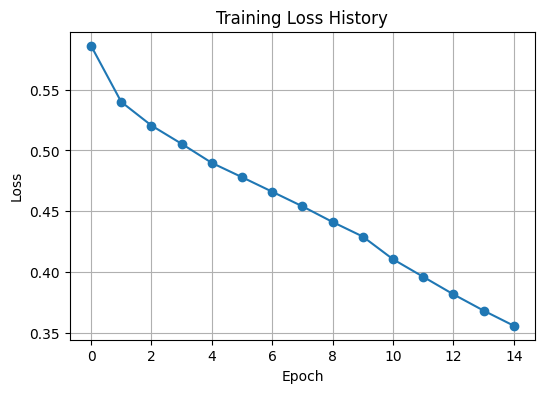

Training [100%] Loss: 0.3561


In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bc.to(device)
epochs = 5

for epoch in range(epochs):
    # 에폭 진행률 바
    epoch_bar = tqdm(range(len(train_loader)),
                     desc=f"Epoch {epoch+1}/{epochs}",
                     leave=False)   # leave=False면 다음 에폭 때 덮어씀

    total_loss = []
    for bidx, (data, target) in zip(epoch_bar, train_loader):
        optimizer.zero_grad(set_to_none=True)
        data, target = data.to(device), target.to(device)
        output = bc(data)
        loss   = loss_func(output, target.squeeze())

        total_loss.append(loss.item())
        loss.backward()
        optimizer.step()

        # 100배치마다 postfix로 현재 상태 표시
        if bidx % 100 == 0:
            epoch_bar.set_postfix(batch=bidx,
                                  loss=f"{loss.item():.4f}")

    # 에폭 끝나면 전체 loss 기록
    avg_loss = sum(total_loss) / len(total_loss)
    loss_history.append(avg_loss)

    #loss history 그리기
    clear_output(wait=True)
    plt.figure(figsize=(6, 4))
    plt.plot(loss_history, marker='o')
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    # 에폭 요약 한 줄 출력 (leave=False였으면 이게 마지막 줄로 남음)
    print(f"Training [{100.0 * (epoch+1)/epochs:.0f}%] "
          f"Loss: {avg_loss:.4f}")


# 모델 추론

In [ ]:
from datetime import datetime

test_loader = DataLoader(
    test_ds,
    batch_size=1,
    shuffle=False
)

bc.eval()

all_preds, all_targets = [], []

with torch.no_grad():
    for data, target in tqdm(test_loader,
                             desc="Inference",
                             total=len(test_loader),
                             leave=False):
        data, target = data.to(device), target.to(device)

        logits = bc(data)

        pred = logits.argmax().view(1)

        all_preds.append(pred.cpu())
        all_targets.append(target.view(-1).cpu())

y_pred = torch.cat(all_preds).numpy().astype(int)
y_true = torch.cat(all_targets).numpy().astype(int)

 # 평가 및 결과 저장

In [ ]:
# 0·6 라벨만 평가
test_mask = (y_true == 0) | (y_true == 6)

print("total samples:", len(y_true))
print("target samples:", test_mask.sum())

# 모델 결과가 1인 것을 6으로 변경
y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

acc = (y_pred_mapped[test_mask] == y_true[test_mask]).mean()
print(f"accuracy (labels 0/6 only): {acc:.4f}")

# 현재 시각을 "YYYYMMDD_HHMMSS" 형식으로 포맷팅
now = datetime.now().strftime("%Y%m%d_%H%M%S")

# 원본 파일명을 기반으로 새 파일명 생성
y_pred_filename = f"y_pred_{now}.csv"

np.savetxt(y_pred_filename, y_pred_mapped, fmt="%d")

total samples: 10000
target samples: 2000
accuracy (labels 0/6 only): 0.8900


# 모델 추론 결과 파일 다운로드

자동으로 다운로드되는 파일을 [제출하기](https://aifactory.space/task/9154/submit) 페이지에 업로드하면 자동으로 채점이 되며 정상적으로 채점이 된다면 리더보드에서 자기점수를 확인할 수 있습니다.


In [ ]:
from google.colab import files

files.download(y_pred_filename)

NameError: name 'y_pred_filename' is not defined

# 파라미터 추출

In [ ]:
torch.save(bc.state_dict(), "HSK_model2_params.pth")
files.download("HSK_model2_params.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 파라미터 확인

In [ ]:
for name, param in bc.named_parameters():
    print(f"{name}: {param.data}")

qnn_params: tensor([0.5861, 0.4568, 0.1755, 0.9701, 0.8020, 0.6269, 0.8943, 0.9922, 0.8712])
conv1.weight: tensor([[[[ 0.1407,  0.0609, -0.1728, -0.1761,  0.0667],
          [ 0.0717, -0.0808, -0.0857,  0.0267, -0.0727],
          [ 0.0196, -0.0952,  0.1811,  0.0529, -0.1085],
          [ 0.0120, -0.1403,  0.0304,  0.1115,  0.1005],
          [-0.1966,  0.1402,  0.0201, -0.1746, -0.0922]]],


        [[[ 0.0971, -0.0719, -0.0328, -0.0382,  0.0592],
          [-0.0400, -0.0779,  0.1097,  0.0333,  0.0948],
          [ 0.1881, -0.0689, -0.0837, -0.1984,  0.1251],
          [ 0.0620, -0.0613, -0.1076, -0.1109,  0.0899],
          [-0.1776,  0.0504,  0.0653,  0.1338, -0.1828]]]])
conv1.bias: tensor([0.1327, 0.0484])
conv2.weight: tensor([[[[ 0.0767,  0.1268,  0.0768,  0.0626, -0.1413],
          [-0.0545, -0.0606,  0.1099,  0.0244,  0.1207],
          [ 0.0997,  0.0330,  0.1036,  0.0979,  0.0961],
          [ 0.0945,  0.0265, -0.0625, -0.1392, -0.1087],
          [-0.0674,  0.1338,  0.1266,

# 파라미터 로딩

In [ ]:
state_dict = torch.load("HSK_model2_params.pth")
bc.load_state_dict(state_dict)

<All keys matched successfully>